In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
%matplotlib inline

In [39]:
datadir = 'data-2018-06-11-10:42:37'

# find files
files = []
file = os.path.join(datadir, 'data-ref.npz')
if os.path.isfile(file):
    print('Found {}'.format(file))
    files.append(file)
else:
    print('cannot find {}'.format(file))
    
file = os.path.join(datadir, 'data-scipy.npz')
if os.path.isfile(file):
    print('Found {}'.format(file))
    files.append(file)

for i in range(1,65):
    file = os.path.join(datadir, 'data-omp-{}.npz'.format(i))
    if os.path.isfile(file):
        print('Found {}'.format(file))
        files.append(file)

df = pd.DataFrame()
for f in files:
    test = os.path.splitext(os.path.basename(f))[0][5:]
    data = np.load(f)
    times = data['times']
    flops = data['flops']
    df = df.append(pd.DataFrame({'times': times,
                                 'flops': flops,
                                 'run': np.arange(len(times)),
                                 'test': test}))

Found data-2018-06-11-10:42:37/data-ref.npz
Found data-2018-06-11-10:42:37/data-scipy.npz
Found data-2018-06-11-10:42:37/data-omp-1.npz
Found data-2018-06-11-10:42:37/data-omp-2.npz
Found data-2018-06-11-10:42:37/data-omp-3.npz
Found data-2018-06-11-10:42:37/data-omp-4.npz
Found data-2018-06-11-10:42:37/data-omp-5.npz
Found data-2018-06-11-10:42:37/data-omp-6.npz
Found data-2018-06-11-10:42:37/data-omp-7.npz
Found data-2018-06-11-10:42:37/data-omp-8.npz
Found data-2018-06-11-10:42:37/data-omp-9.npz
Found data-2018-06-11-10:42:37/data-omp-10.npz
Found data-2018-06-11-10:42:37/data-omp-11.npz
Found data-2018-06-11-10:42:37/data-omp-12.npz
Found data-2018-06-11-10:42:37/data-omp-13.npz
Found data-2018-06-11-10:42:37/data-omp-14.npz
Found data-2018-06-11-10:42:37/data-omp-15.npz
Found data-2018-06-11-10:42:37/data-omp-16.npz
Found data-2018-06-11-10:42:37/data-omp-17.npz
Found data-2018-06-11-10:42:37/data-omp-18.npz
Found data-2018-06-11-10:42:37/data-omp-19.npz
Found data-2018-06-11-10:4

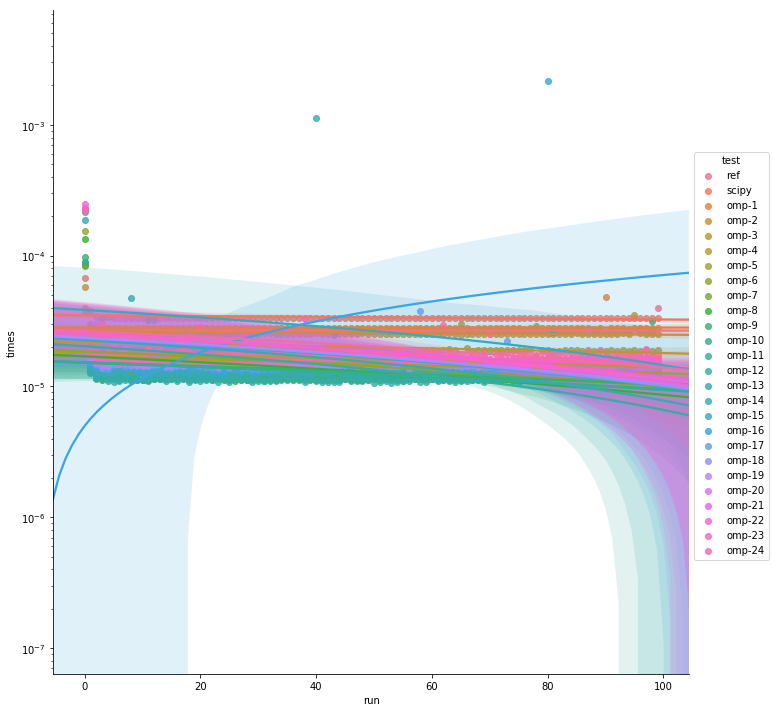

In [40]:
g = sns.lmplot(x="run", y="times", hue="test",
               data=df, size=10)
ax = plt.gca()
ax.set_yscale('log')

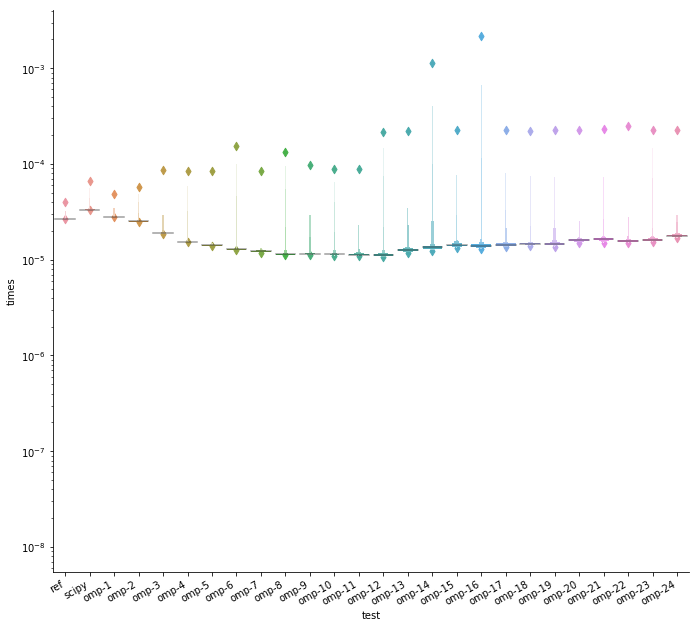

In [41]:
g = sns.factorplot(x="test", y="times", data=df,
                   size=10, kind="lv")
ax = plt.gca()
fig = plt.gcf()
fig.autofmt_xdate()
ax.set_yscale('log')

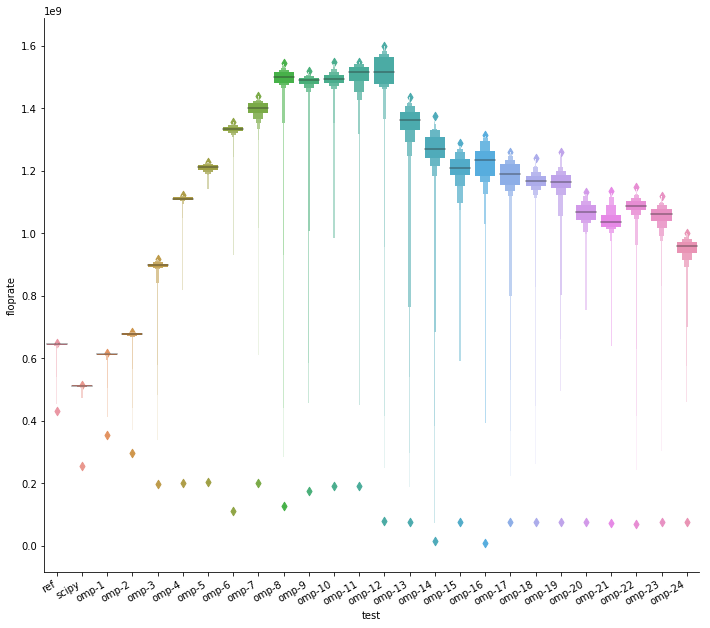

In [42]:
df['floprate'] = df['flops'] / df['times']
g = sns.factorplot(x="test", y="floprate", data=df,
                   size=10, kind="lv")
ax = plt.gca()
fig = plt.gcf()
fig.autofmt_xdate()
#ax.set_yscale('log')